## Analysis of reddit communities
* Downloaded https://files.pushshift.io/reddit/comments/ file from October 2018 (RC_2018-10) , File of comments on reddit
* Analysis on the first 13012524  comments of the month

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import codecs

In [5]:
%matplotlib inline

In [6]:
df_comments=pd.read_json(codecs.open('./data/filtered.json','r','utf-8'), orient='records', lines=True, encoding='utf-8')

In [7]:
df_comments.head()

,author,author_created,created,subredit,text
0,TistedLogic,1.312616e+09,1538352000,Unexpected,Is it still r/BoneAppleTea worthy if it's the ...
1,misssaladfingers,1.536865e+09,1538352000,insomnia,I've tried and it's hit and miss. When it's go...
2,Increase_Vitality,1.467817e+09,1538352000,pics,"Hey that's great, I mean it. \n\nIn the other ..."
3,volkanize,1.531799e+09,1538352000,NoStupidQuestions,once a guy pulled a gun on me and i ran like 3...
4,[deleted],NaN,1538352000,steroids,[removed]


In [8]:
df_comments.to_pickle('./data/comments.pkl')

In [12]:
df_comments.shape

(13012524, 5)

In [17]:
df_comments.subredit.value_counts().describe()

count     48412.000000
mean        268.787160
std        3975.907754
min           1.000000
25%           2.000000
50%           6.000000
75%          33.000000
max      637181.000000
Name: subredit, dtype: float64

In [22]:
#Only leaving comments for values above 33 (75%)
communities=df_comments.subredit.value_counts()[df_comments.subredit.value_counts()>33].index.values

In [57]:
len(communities)

12050

In [24]:
df_comments=df_comments[df_comments.subredit.isin(communities)]

In [26]:
#Most active communities in the dataset
df_comments.subredit.value_counts().head(20)

AskReddit          637181
politics           289342
The_Donald         150479
nfl                139927
fantasyfootball    124792
funny              112806
FortNiteBR         100433
AskOuija            97038
gaming              93611
baseball            92335
news                91976
worldnews           88473
soccer              83095
DestinyTheGame      81821
leagueoflegends     79995
pics                79692
nba                 74524
dankmemes           73867
wow                 68914
todayilearned       67922
Name: subredit, dtype: int64

In [72]:
df_gp_author=df_comments.groupby('author')

In [73]:
grouped_author=df_gp_author.agg({'author':'count','subredit':set})

In [74]:
grouped_author.rename(columns={'author':'count_times'},inplace=True)

In [75]:
#The most prolific authors are bots
grouped_author.sort_values(by='count_times',ascending=False)

,count_times,subredit
author,,
[deleted],859910,"{Re_Zero, chastity, Cortex, wallstreetbets, ca..."
AutoModerator,130860,"{cookingforbeginners, Re_Zero, Metalcore, MtAu..."
MemeInvestor_bot,25673,{MemeEconomy}
KeepingDankMemesDank,8424,{dankmemes}
Robert_Stokes,5125,"{Live_TV_Hd, u_Robert_Stokes}"
transcribersofreddit,4643,{TranscribersOfReddit}
MTGCardFetcher,3900,"{Naturewasmetal, ElvesMTG, custommagic, magicT..."
LostZookeepergame,3495,"{livestream_online, enjoy_sports}"
CommonMisspellingBot,3149,"{cookingforbeginners, Cortex, cardano, Shoestr..."


In [76]:
#Remove author [deleted] and moderator
grouped_author.drop('[deleted]', inplace=True)
grouped_author.drop('AutoModerator', inplace=True)



In [77]:
grouped_author['how_many']=grouped_author.apply(lambda row: len(row['subredit']),axis=1)

In [78]:
#Bots are the authors that visit most 
grouped_author.sort_values(by='how_many',ascending=False)

,count_times,subredit,how_many
author,,,
CommonMisspellingBot,3149,"{cookingforbeginners, Cortex, cardano, Shoestr...",1664
imguralbumbot,3147,"{PenmanshipPorn, grilling, chastity, Cubers, c...",1493
TotesMessenger,2306,"{RotMG, MtAugusta, chastity, GetStudying, Stru...",1147
WikiTextBot,1626,"{WorldofTanks, SCJerk, selfpublish, assassinsc...",843
B0tRank,1164,"{HPHogwartsMystery, MyPeopleNeedMe, argentina,...",788
RemindMeBot,1319,"{RotMG, minimalism, argentina, StruggleFucking...",743
Bot_Metric,1222,"{cookingforbeginners, grilling, chastity, crip...",724
sneakpeekbot,1102,"{cripplingalcoholism, deathgrips, Cubers, NSFW...",684
ClickableLinkBot,1067,"{HighResNSFW, BikiniBottomTwitter, Cortex, lif...",484


/home/profesor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


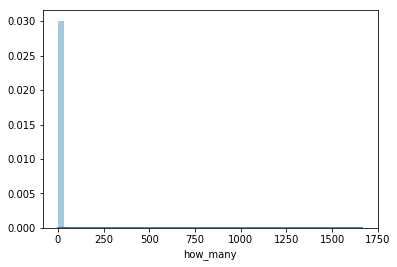

In [79]:
sns.distplot(grouped_author.how_many)

In [80]:
grouped_author.how_many.describe()

count    1.939643e+06
mean     2.226503e+00
std      3.593105e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.664000e+03
Name: how_many, dtype: float64

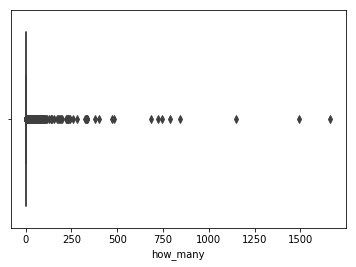

In [81]:
sns.boxplot(grouped_author.how_many)

In [82]:
limited_authors=grouped_author[grouped_author.how_many>2]

In [83]:
limited_authors.shape

(448905, 3)

In [84]:
#Stopped running out of time
for i in communities:
    limited_authors[i]=limited_authors['subredit'].apply(lambda x : i in x)

/home/profesor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyboardInterrupt: 

In [ ]:
for i in communities:
    limited_authors[i]=False

In [ ]:
for i in communities:
    limited_authors[i]=limited_authors['subredit'].apply(lambda x : i in x)
    

In [90]:
final_cols=list(set(limited_authors.columns) - set(grouped_author.columns))

In [98]:
limited_authors['total_limited']=limited_authors[final_cols].sum(axis=1)

/home/profesor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
limited_authors=limited_authors[limited_authors.total_limited>0]

In [110]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
X=limited_authors[final_cols]
W = model.fit_transform(X)
H = model.components_

In [127]:
sum(X.sum())/(X.shape[0]*X.shape[1])

0.010430742511781178

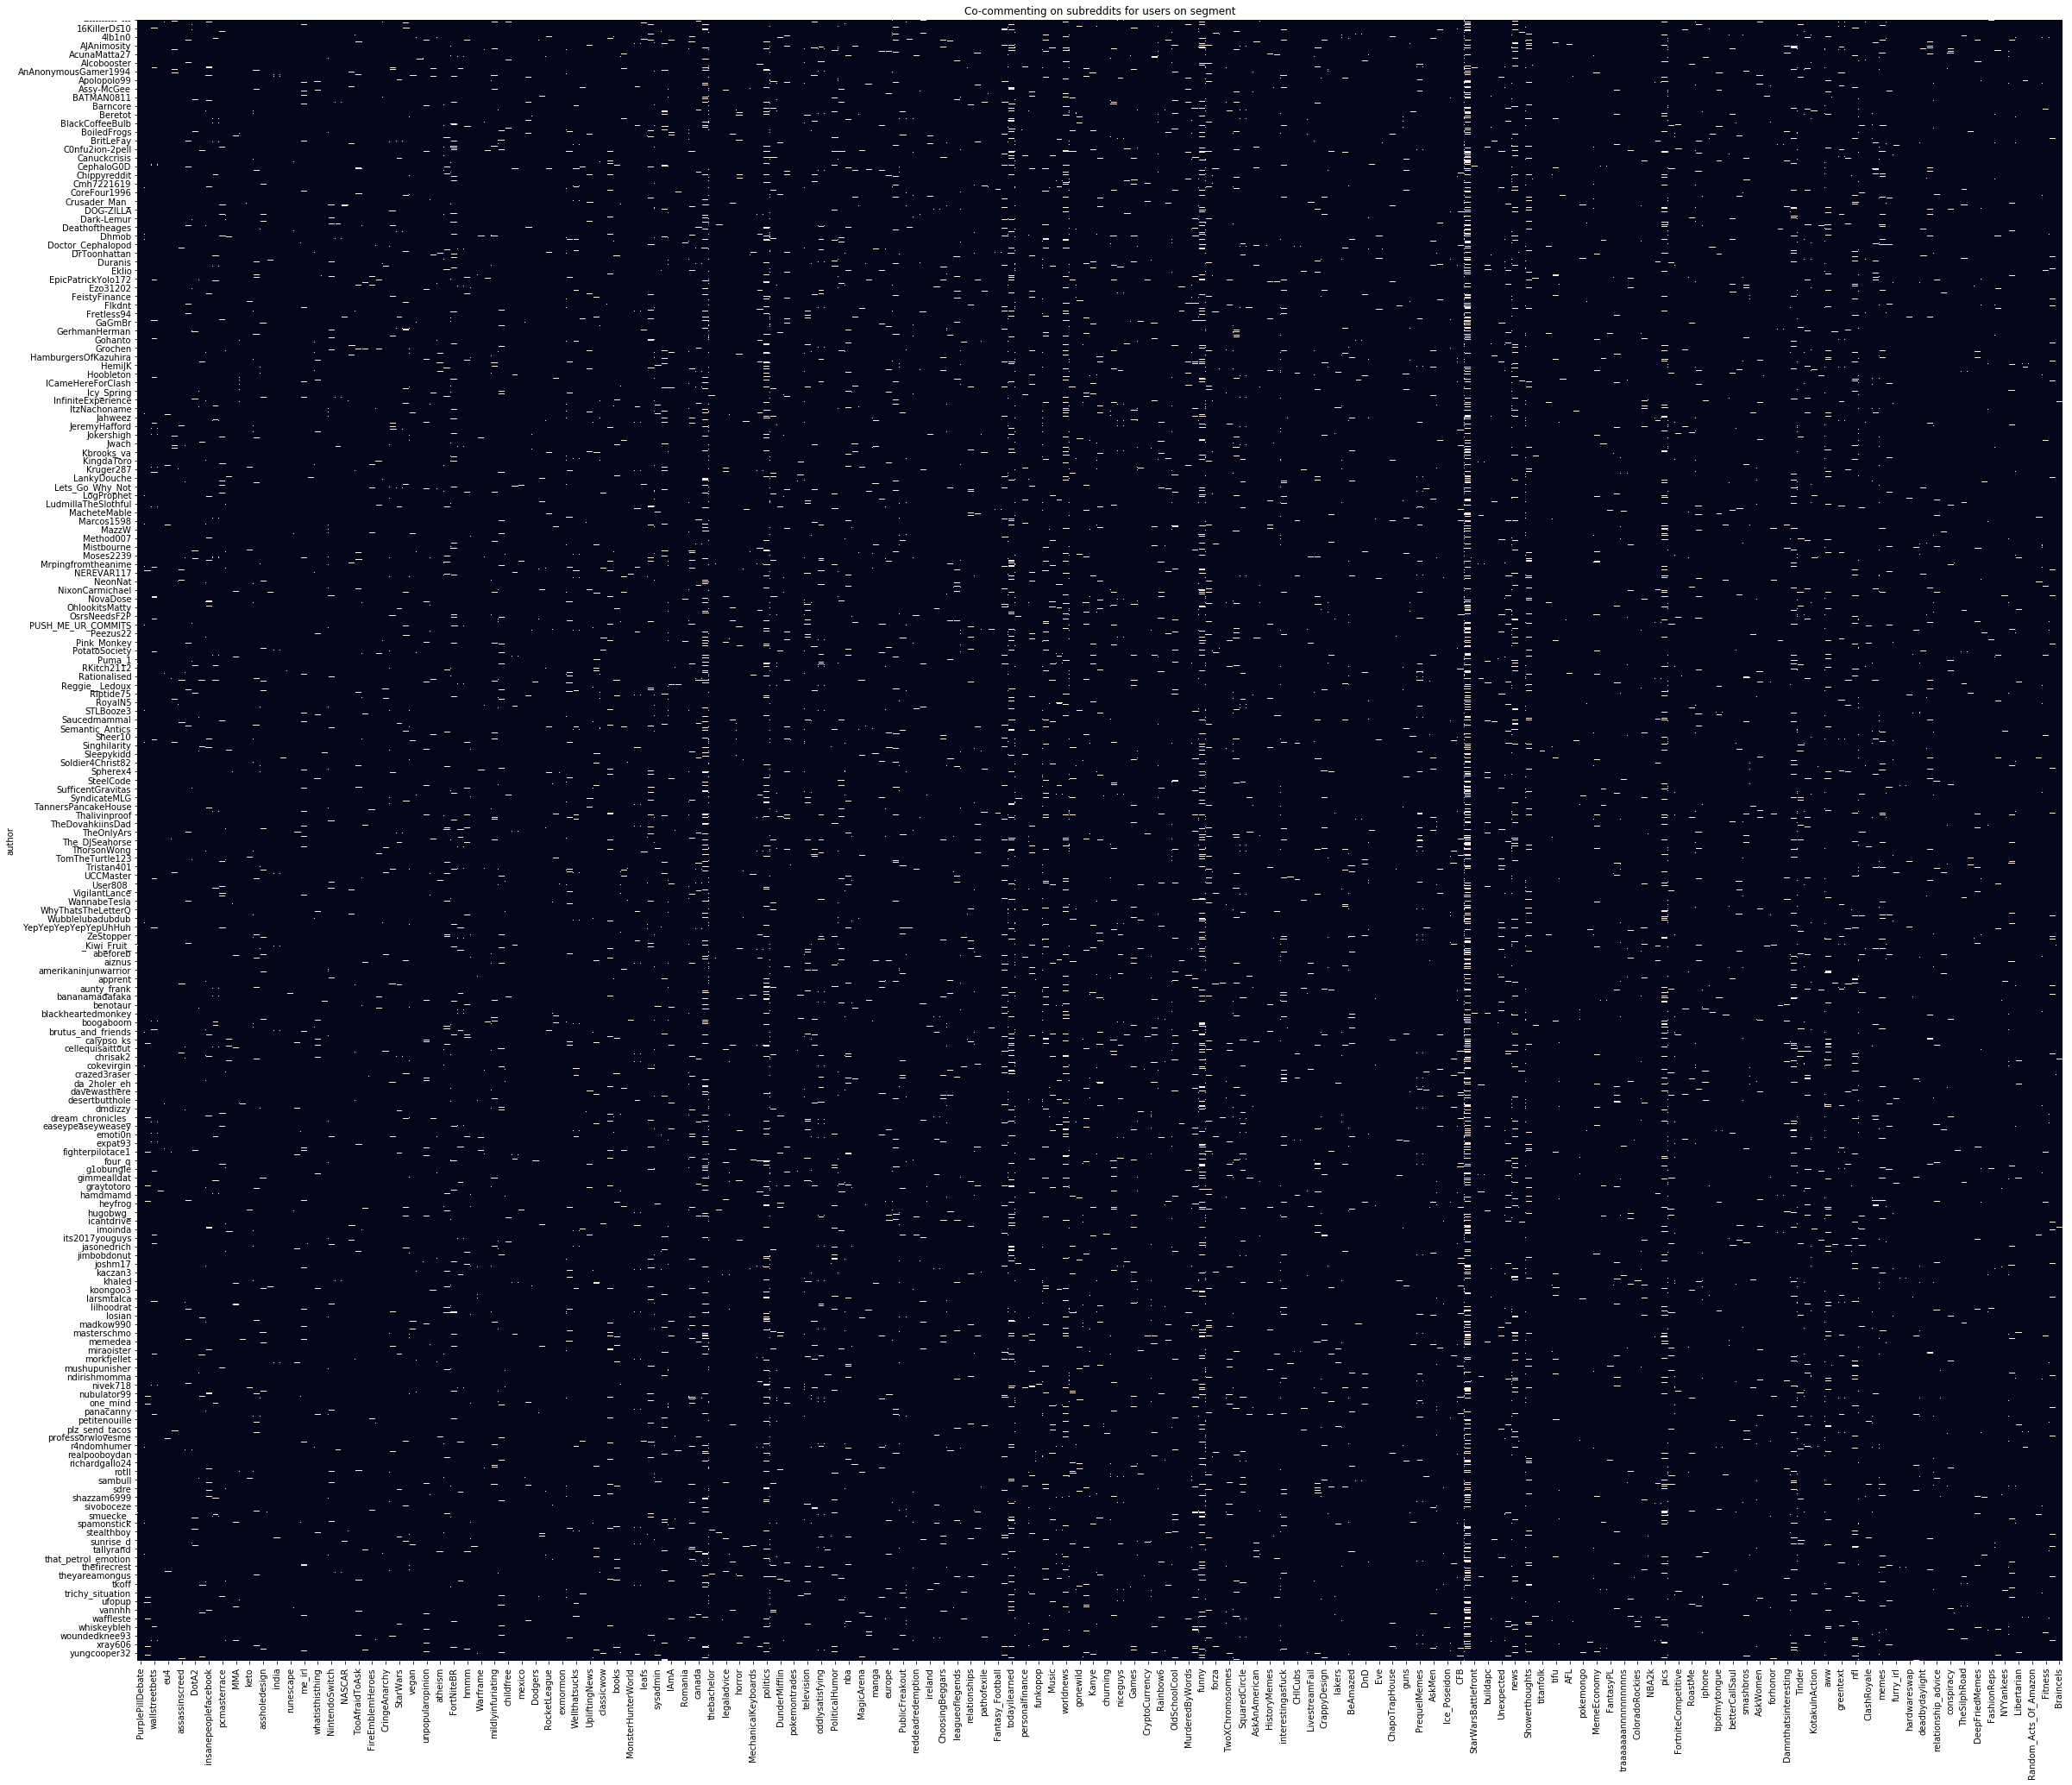

In [109]:
plt.figure(figsize=(40, 35))
ax = plt.axes()
sns.heatmap(X, cbar=False, ax = ax)
ax.set_title("Co-commenting on subreddits for users on segment")
plt.show()

In [111]:
W.shape

(395157, 10)

In [112]:
H.shape

(10, 283)

In [113]:
X.shape

(395157, 283)

In [118]:
df_h=pd.DataFrame(H.T)

In [120]:
df_h['subreddit']=final_cols

In [145]:
df_h.index=df_h.subreddit

In [153]:
df_h.var()

0    0.004248
1    0.004891
2    0.007614
3    0.017941
4    0.009389
5    0.015522
6    0.011716
7    0.016766
8    0.012256
9    0.019297
dtype: float64

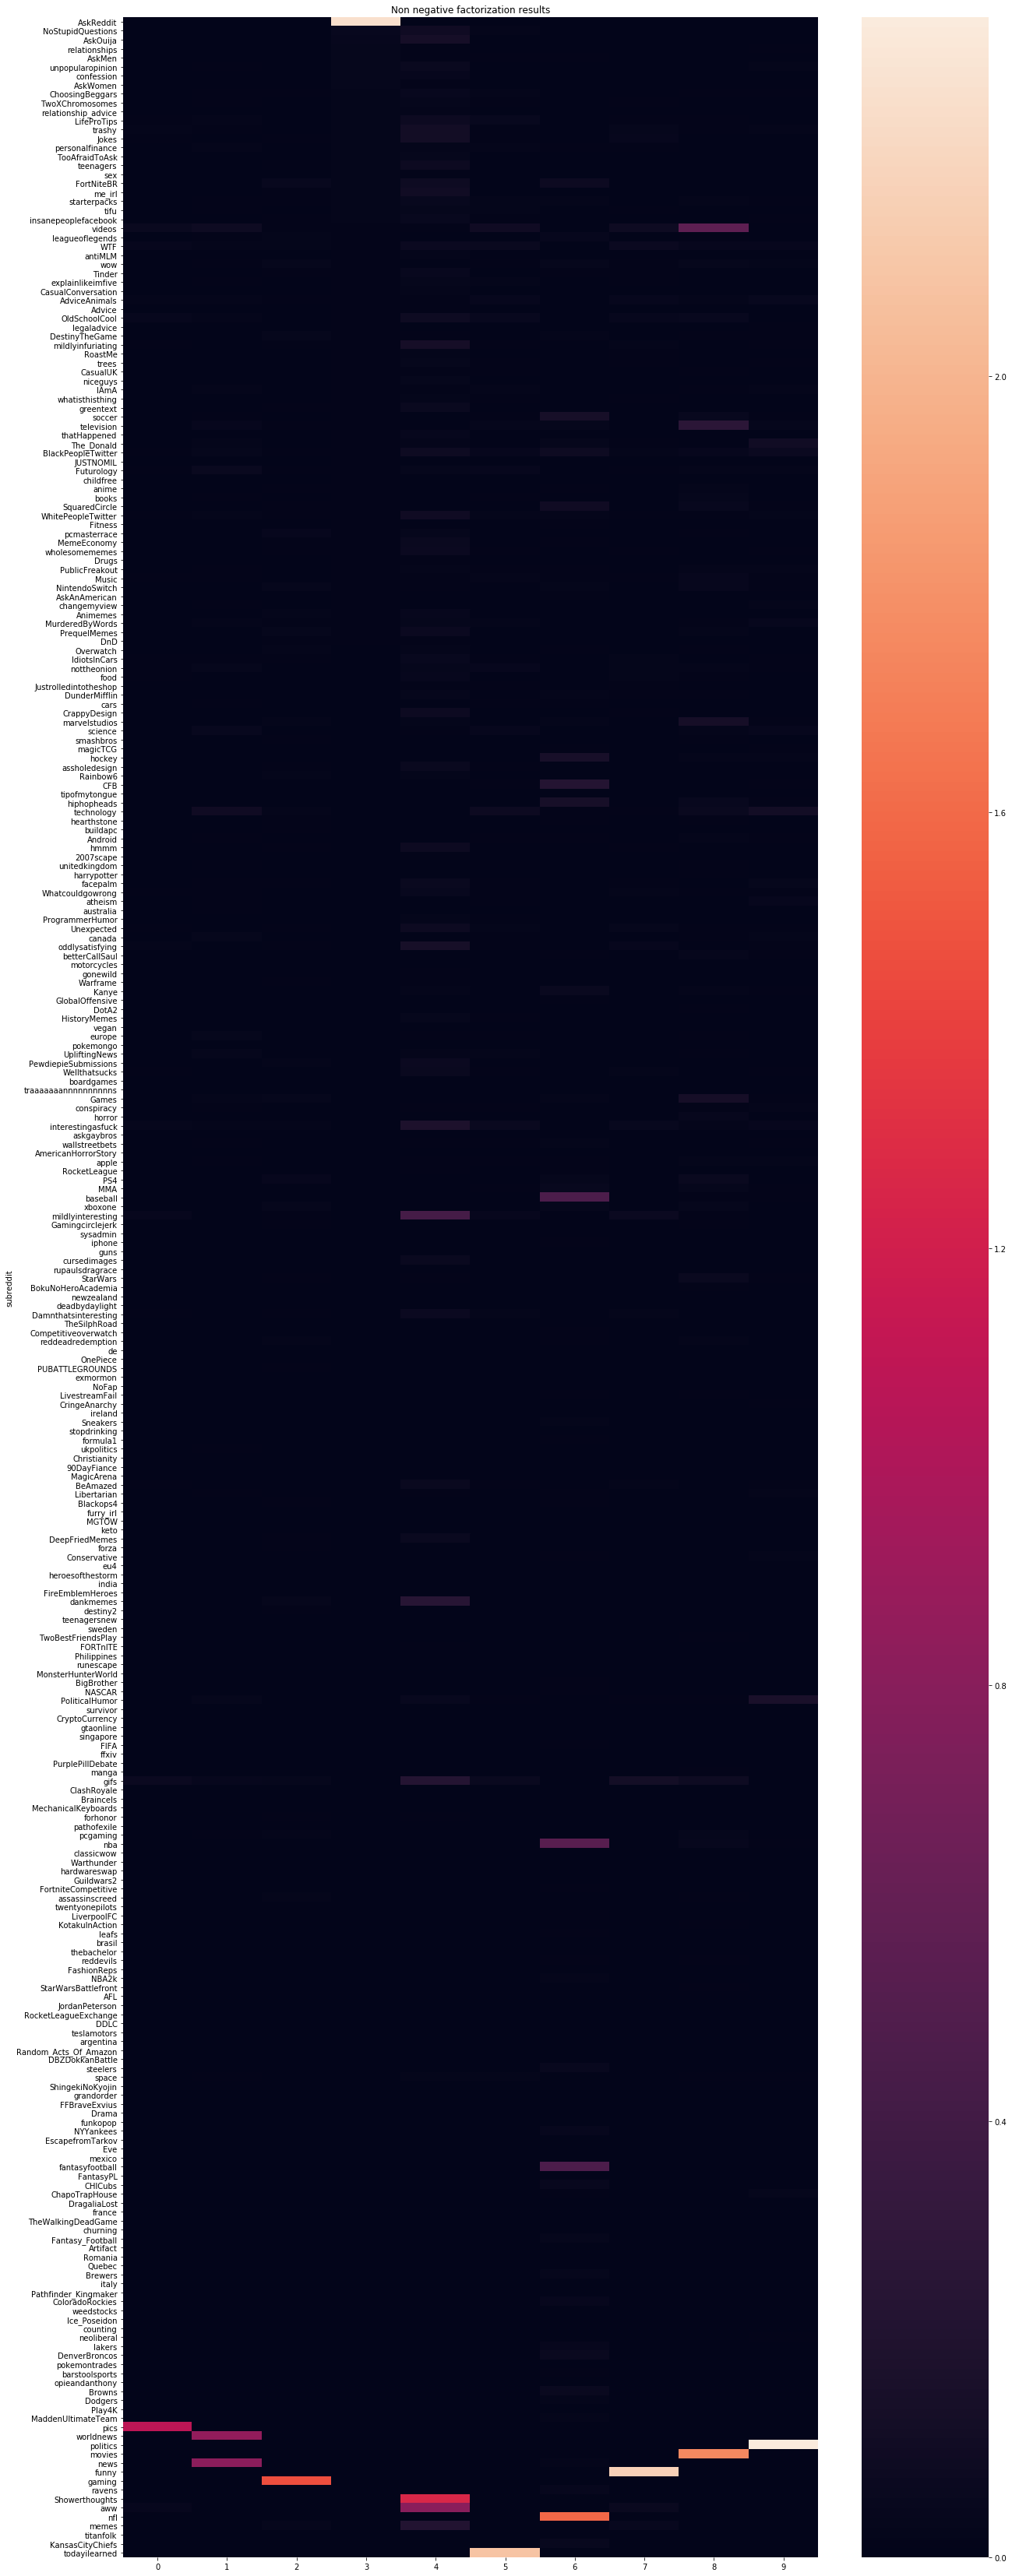

In [154]:
plt.figure(figsize=(20, 60))
ax = plt.axes()
sns.heatmap(df_h[list(range(0,10))].sort_values(by=3, ascending=False),  ax = ax)
ax.set_title("Non negative factorization results")
plt.show()

In [174]:
#Final Table
df_results=pd.DataFrame()

In [176]:
for i in range(0,10):
    df_results[i]=df_h.sort_values(by=i, ascending=False)['subreddit'].head(10).values

In [177]:
df_results

,0,1,2,3,4,5,6,7,8,9
0,pics,worldnews,gaming,AskReddit,Showerthoughts,todayilearned,nfl,funny,movies,politics
1,gifs,news,FortNiteBR,NoStupidQuestions,aww,videos,nba,gifs,videos,PoliticalHumor
2,videos,technology,pcmasterrace,AskOuija,mildlyinteresting,technology,fantasyfootball,videos,television,technology
3,WTF,videos,PS4,relationships,dankmemes,gifs,baseball,WTF,Games,The_Donald
4,mildlyinteresting,Futurology,Games,AskMen,gifs,interestingasfuck,CFB,mildlyinteresting,marvelstudios,BlackPeopleTwitter
5,aww,science,dankmemes,unpopularopinion,memes,WTF,hockey,aww,gifs,AdviceAnimals
6,OldSchoolCool,television,xboxone,confession,interestingasfuck,OldSchoolCool,hiphopheads,memes,PS4,atheism
7,interestingasfuck,gifs,DestinyTheGame,AskWomen,oddlysatisfying,LifeProTips,soccer,interestingasfuck,technology,MurderedByWords
8,oddlysatisfying,nottheonion,NintendoSwitch,ChoosingBeggars,AskOuija,mildlyinteresting,SquaredCircle,Jokes,StarWars,WTF
9,AdviceAnimals,PoliticalHumor,gifs,TwoXChromosomes,mildlyinfuriating,AdviceAnimals,BlackPeopleTwitter,oddlysatisfying,soccer,science


In [170]:
df_h.sort_values(by=0, ascending=False)[[0]].head(10)

,0
subreddit,
pics,1.091365
gifs,0.071491
videos,0.055684
WTF,0.042006
mildlyinteresting,0.041190
aww,0.039736
OldSchoolCool,0.036539
interestingasfuck,0.033322
oddlysatisfying,0.020685


In [159]:
df_h.sort_values(by=1, ascending=False)[[1]].head(10)

,1
subreddit,
worldnews,0.846885
news,0.810517
technology,0.099377
videos,0.082729
Futurology,0.056752
science,0.046855
television,0.037782
gifs,0.037519
nottheonion,0.034467


In [160]:
df_h.sort_values(by=2, ascending=False)[[2]].head(10)

,2
subreddit,
gaming,1.467324
FortNiteBR,0.050377
pcmasterrace,0.044717
PS4,0.042168
Games,0.035824
dankmemes,0.034882
xboxone,0.034793
DestinyTheGame,0.034555
NintendoSwitch,0.034079


In [161]:
df_h.sort_values(by=3, ascending=False)[[3]].head(10)

,3
subreddit,
AskReddit,2.256401
NoStupidQuestions,0.047468
AskOuija,0.037443
relationships,0.035706
AskMen,0.031960
unpopularopinion,0.031611
confession,0.031590
AskWomen,0.027441
ChoosingBeggars,0.026072


In [162]:
df_h.sort_values(by=4, ascending=False)[[4]].head(10)

,4
subreddit,
Showerthoughts,1.264503
aww,0.802913
mildlyinteresting,0.418547
dankmemes,0.237095
gifs,0.218928
memes,0.212305
interestingasfuck,0.174708
oddlysatisfying,0.138253
AskOuija,0.133254


In [163]:
df_h.sort_values(by=5, ascending=False)[[5]].head(10)

,5
subreddit,
todayilearned,2.091650
videos,0.099624
technology,0.078834
gifs,0.063226
interestingasfuck,0.062015
WTF,0.056836
OldSchoolCool,0.052958
LifeProTips,0.048242
mildlyinteresting,0.045442


In [164]:
df_h.sort_values(by=6, ascending=False)[[6]].head(10)

,6
subreddit,
nfl,1.591043
nba,0.533297
fantasyfootball,0.466083
baseball,0.465999
CFB,0.220380
hockey,0.150590
hiphopheads,0.136663
soccer,0.136509
SquaredCircle,0.092331


In [165]:
df_h.sort_values(by=7, ascending=False)[[7]].head(10)

,7
subreddit,
funny,2.172000
gifs,0.123809
videos,0.085547
WTF,0.071060
mildlyinteresting,0.065860
aww,0.054807
memes,0.051058
interestingasfuck,0.048396
Jokes,0.043162


In [166]:
df_h.sort_values(by=8, ascending=False)[[8]].head(10)

,8
subreddit,
movies,1.749830
videos,0.565551
television,0.266592
Games,0.130656
marvelstudios,0.128271
gifs,0.082169
PS4,0.063040
technology,0.059964
StarWars,0.054698


In [168]:
df_h.sort_values(by=9, ascending=False)[[9]].head(10)

,9
subreddit,
politics,2.329137
PoliticalHumor,0.160308
technology,0.114722
The_Donald,0.105220
BlackPeopleTwitter,0.066705
AdviceAnimals,0.046858
atheism,0.042581
MurderedByWords,0.041420
WTF,0.040500


In [169]:
df_h.sort_values(by=10, ascending=False)[[10]].head(10)

KeyError: 10